# Intern Name-Vishal Choudhary

# Task 4: Decision Tree Algorithm

### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
import os

In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets

### Reading the dataset

In [3]:
iris=datasets.load_iris()
iris
df= pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target=iris.target
iris.target_names

iris_data=df.copy()
iris_data['species']=target
iris_data['species']=iris_data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Summary of the dataset

In [6]:
iris_data.shape

(150, 5)

In [7]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [8]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## To find outliers

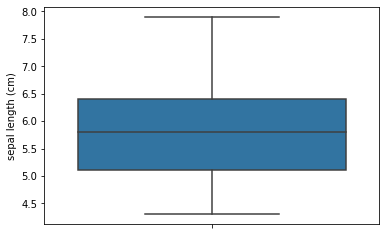

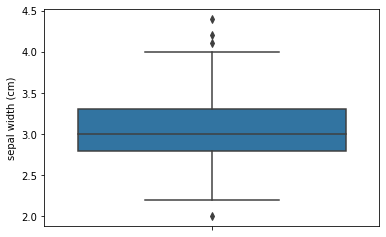

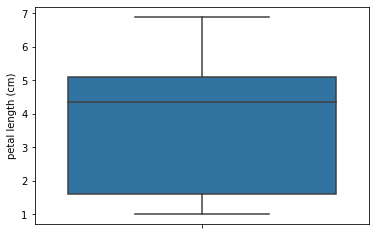

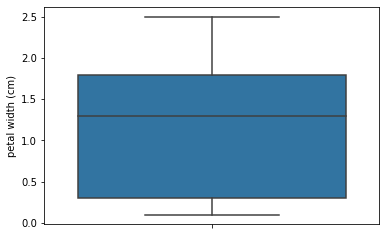

TypeError: Vertical orientation requires numeric `y` variable.

In [9]:
cols=iris_data.columns
for i in cols:
    sns.boxplot(y=iris_data[i])
    plt.show()

### To remove outliers from 'sepal width (cm)'

In [ ]:
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
iqr=q3-q1
df=df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]

### Blocplot for sepal width (cm) after outlier treatment

In [ ]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
iris_data['species']=le.fit_transform(iris_data['species'])

In [ ]:
x=iris_data.iloc[:,[1,2,3]]
y=iris_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,random_state=101)

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

### Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred)

### Accuracy Score

In [ ]:
accuracy_score(y_test,y_pred)*100

### Tree Representation

In [ ]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(classifier,filled=True)
plt.title("Decision Tree Diagram")